In [1]:
import sys
print(sys.version)

3.11.9 (v3.11.9:de54cf5be3, Apr  2 2024, 07:12:50) [Clang 13.0.0 (clang-1300.0.29.30)]


In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, PrecisionRecallDisplay

In [3]:
df=pd.read_csv("../creditcard.csv")
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


**NOTE:** Pricipal component are in comparable range specially in first and third quantile distance. But the Amount and Time shoulde be care of.

In [14]:
# Checkind class imbalance
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

**NOTE**: The Data is highly imbalanced and it should be cared of.

<Axes: xlabel='V1', ylabel='V2'>

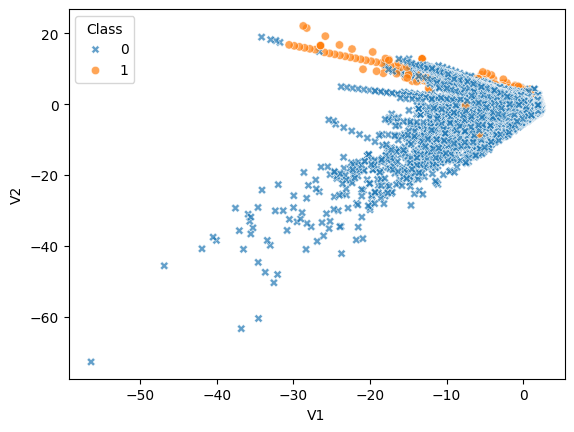

In [42]:
# Visualizing the data based on first and second principal components
sns.scatterplot(data=df, x="V1", y="V2", hue="Class", alpha=0.7, style= "Class", style_order=(1,0))

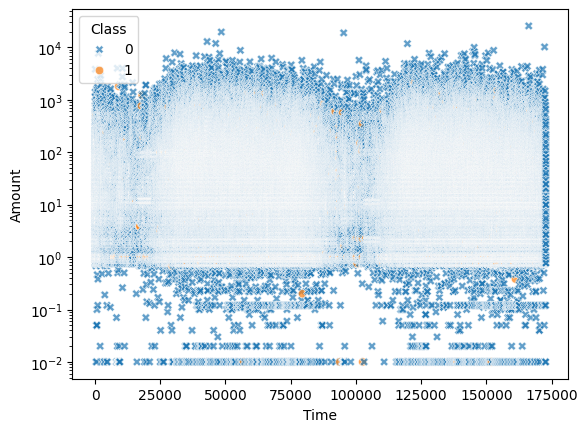

In [41]:
# Visualizing the data based on Time and Amount
sns.scatterplot(data=df, x="Time", y="Amount", hue="Class", alpha=0.7, style= "Class", style_order=(1,0))
plt.yscale("log")

<Axes: >

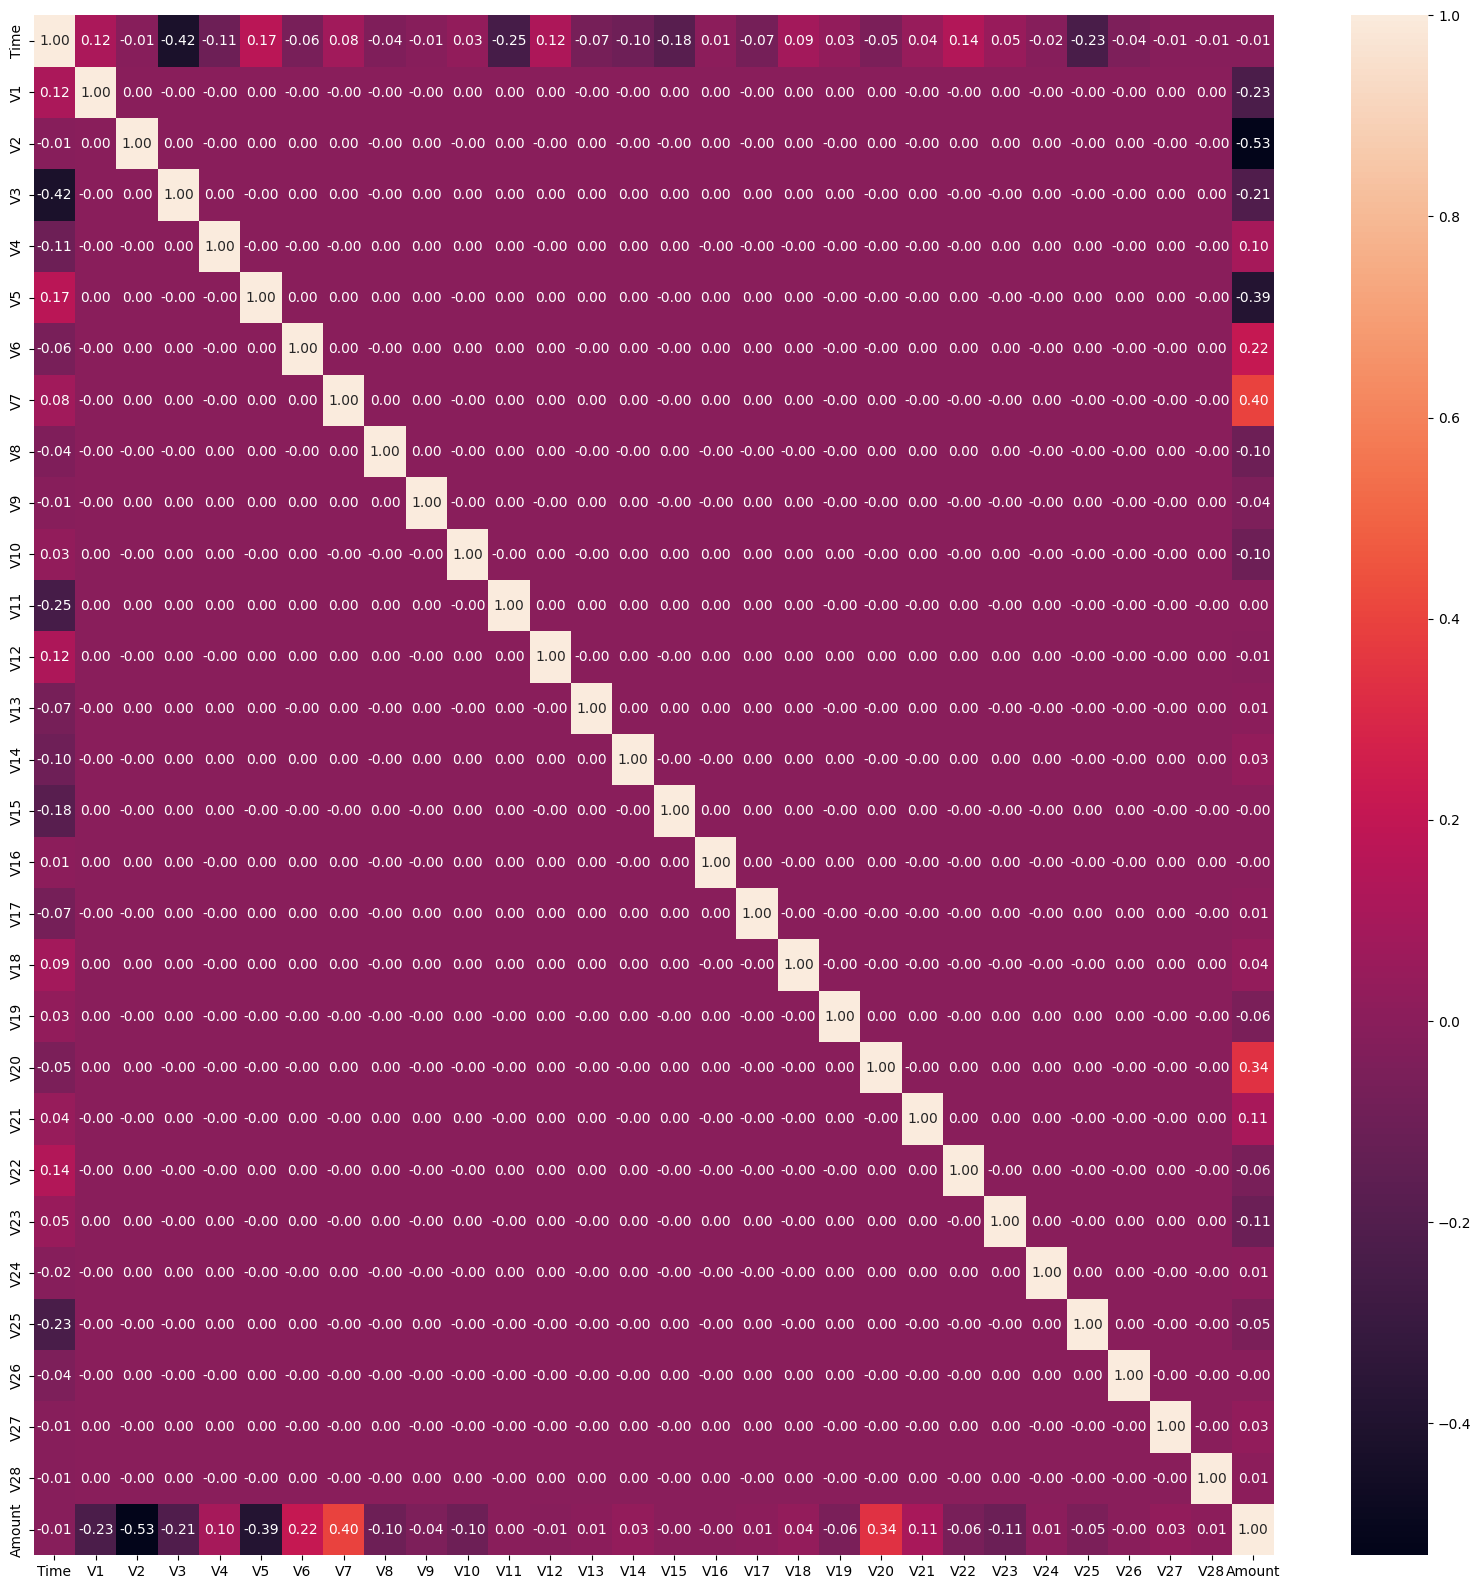

In [54]:
co_mat=df.drop("Class", axis=1).corr()

plt.figure(figsize=(20,20))
sns.heatmap(co_mat, annot=True, fmt=".2f")

**NOTE:** As expected since the available data is the result of PCA, the components does not show ant correlation exept for Time ans Amount.

### Preparing the data

In [9]:
# Separating label from features

X=df.drop("Class", axis=1)
y=df["Class"]
X.shape, y.shape

((284807, 30), (284807,))

In [10]:
# Separating Train and Test set
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199364, 30), (85443, 30), (199364,), (85443,))

In [11]:
# Scaling all data to have a clean distribution

scale=StandardScaler()
scale.fit(X_train)
X_train_scale=scale.transform(X_train)
X_test_scale=scale.transform(X_test)

X_train_scale=pd.DataFrame(X_train_scale, columns=X_train.columns)
X_test_scale=pd.DataFrame(X_test_scale, columns=X_test.columns)

## Model Development

In [35]:
LR=LogisticRegression(class_weight={0:1, 1:5})
LR.fit(X_train, y_train)
LR.score(X_train, y_train), LR.score(X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.998194257739612, 0.9985838512224524)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.56      0.85      0.68       148

    accuracy                           1.00     85443
   macro avg       0.78      0.93      0.84     85443
weighted avg       1.00      1.00      1.00     85443



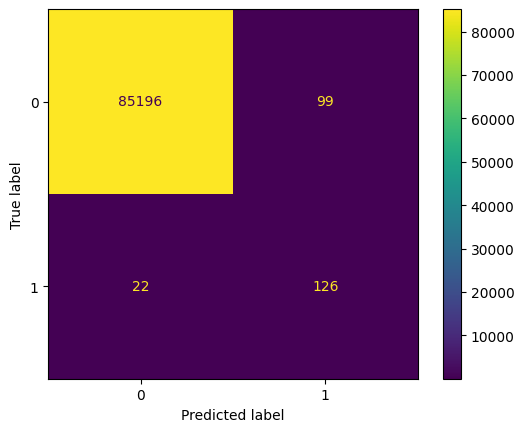

In [36]:
y_pred=LR.predict(X_test)
cm=confusion_matrix(y_test, y_pred, labels=LR.classes_)
cfx = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
print(classification_report(y_test, y_pred, labels=LR.classes_))
cfx.plot()

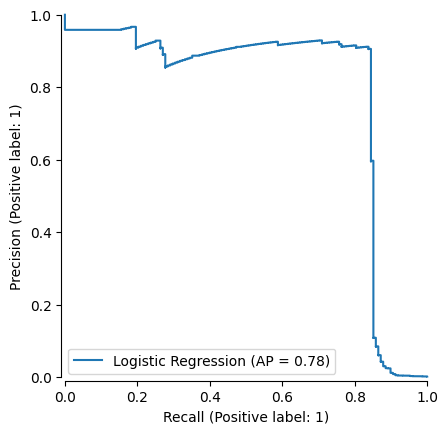

In [37]:
PrecisionRecallDisplay.from_estimator(LR, X_test, y_test, name="Logistic Regression", despine=True)

In [38]:
RF=RandomForestClassifier(class_weight={0:1, 1:5})
RF.fit(X_train, y_train)
RF.score(X_train, y_train), RF.score(X_test, y_test)

(1.0, 0.9996137776061234)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.83      0.88       148

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



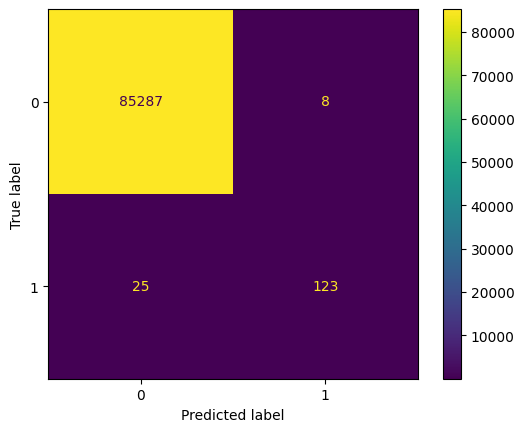

In [39]:
y_pred=RF.predict(X_test)
cm=confusion_matrix(y_test, y_pred, labels=RF.classes_)
cfx = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
print(classification_report(y_test, y_pred, labels=RF.classes_))
cfx.plot()

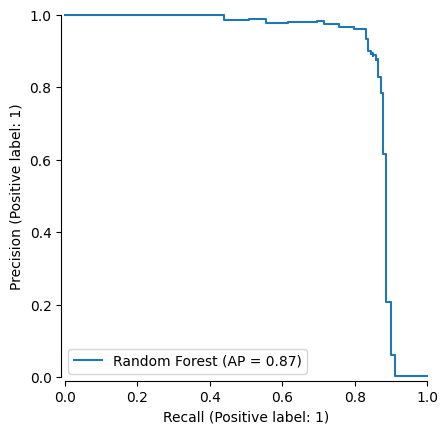

In [40]:
PrecisionRecallDisplay.from_estimator(RF, X_test, y_test, name="Random Forest", despine=True)

In [41]:
# Calculate the number of each class and weight
neg = len(y_train[y_train == 0])
pos = len(y_train[y_train == 1])

ratio = neg / pos

In [42]:
XGB=xgb.XGBClassifier(eval_metric='aucpr', scale_pos_weight=ratio)
XGB.fit(X_train, y_train)
XGB.score(X_train, y_train), XGB.score(X_test, y_test)

(1.0, 0.999602073897218)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.86      0.88       148

    accuracy                           1.00     85443
   macro avg       0.95      0.93      0.94     85443
weighted avg       1.00      1.00      1.00     85443



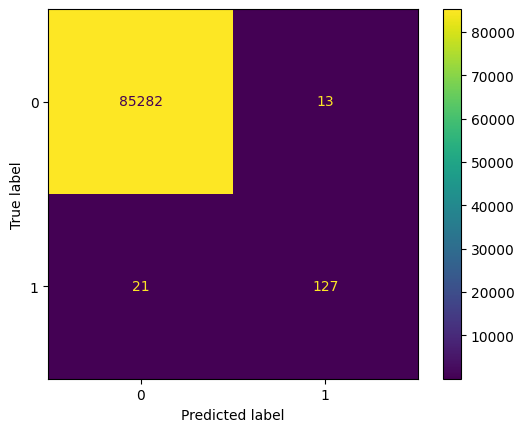

In [43]:
y_pred=XGB.predict(X_test)
cm=confusion_matrix(y_test, y_pred, labels=XGB.classes_)
cfx = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGB.classes_)
print(classification_report(y_test, y_pred, labels=XGB.classes_))
cfx.plot()

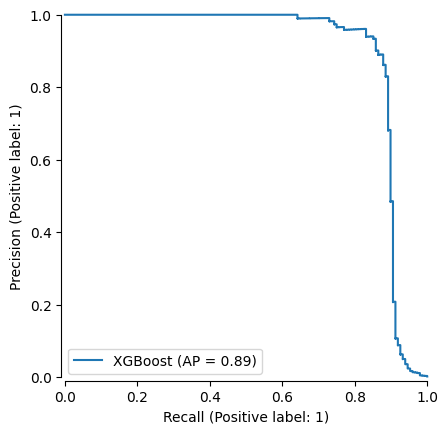

In [44]:
PrecisionRecallDisplay.from_estimator(XGB, X_test, y_test, name="XGBoost", despine=True)

In [50]:
XGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric='aucpr', use_label_encoder=False)

# Define the parameter distributions
param_dist = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    #'scale_pos_weight': [1, 10, 100, 600]
}

# Setup Stratified Cross-Validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

# 4. Initialize Randomized Search
random_search = RandomizedSearchCV(
    estimator=XGB,
    param_distributions=param_dist,
    n_iter=50,           # Number of random combinations to try
    scoring='average_precision', # Search goal: Best Precision-Recall AUC
    cv=cv,
    verbose=3,
    random_state=1,
    n_jobs=-1            # Use all CPU cores
)

# Fit the model
random_search.fit(X_train, y_train)

print(f"Best Score (PR-AUC): {random_search.best_score_}")
print(f"Best Params: {random_search.best_params_}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [11:28:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [11:28:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [11:28:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [11:28:50] WARN

Best Score (PR-AUC): 0.8418968695394757
Best Params: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [51]:
random_search.best_params_

{'subsample': 0.6,
 'n_estimators': 500,
 'max_depth': 3,
 'learning_rate': 0.1,
 'colsample_bytree': 1.0}

In [56]:
XGB=xgb.XGBClassifier(eval_metric='aucpr', scale_pos_weight=ratio, subsample=0.6, n_estimators=500, max_depth=3, learning_rate=0.1, colsample_bytree=1)
XGB.fit(X_train, y_train)
XGB.score(X_train, y_train), XGB.score(X_test, y_test)

(0.9998896490840874, 0.9995903701883126)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.88      0.88       148

    accuracy                           1.00     85443
   macro avg       0.94      0.94      0.94     85443
weighted avg       1.00      1.00      1.00     85443



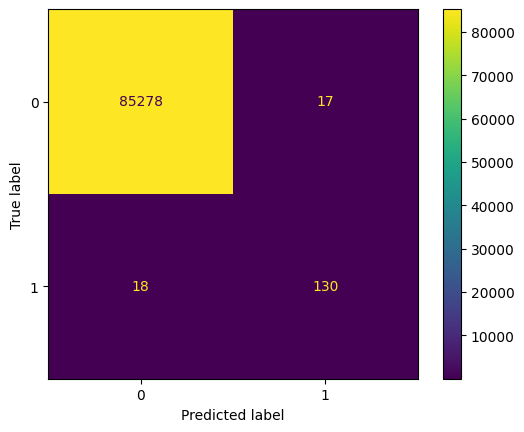

In [57]:
y_pred=XGB.predict(X_test)
cm=confusion_matrix(y_test, y_pred, labels=XGB.classes_)
cfx = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGB.classes_)
print(classification_report(y_test, y_pred, labels=XGB.classes_))
cfx.plot()

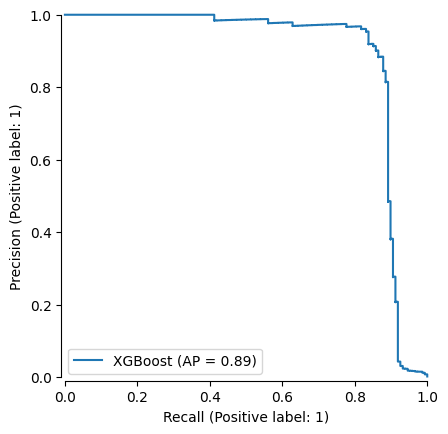

In [58]:
PrecisionRecallDisplay.from_estimator(XGB, X_test, y_test, name="XGBoost", despine=True)

In [ ]:
svc=SVC(class_weight='balanced')
svc.fit(X_train, y_train)
svc.score(X_train, y_train), svc.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

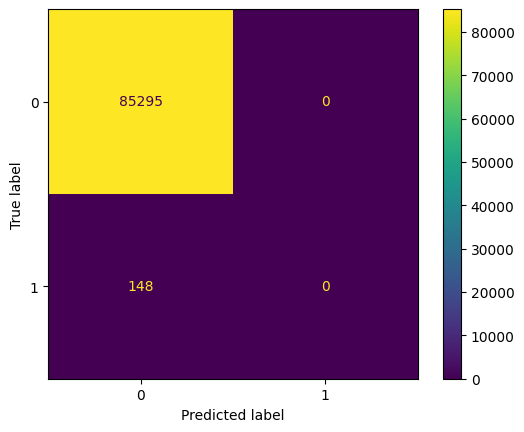

In [63]:
y_pred=svc.predict(X_test)
cm=confusion_matrix(y_test, y_pred, labels=svc.classes_)
cfx = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
print(classification_report(y_test, y_pred, labels=svc.classes_))
cfx.plot()

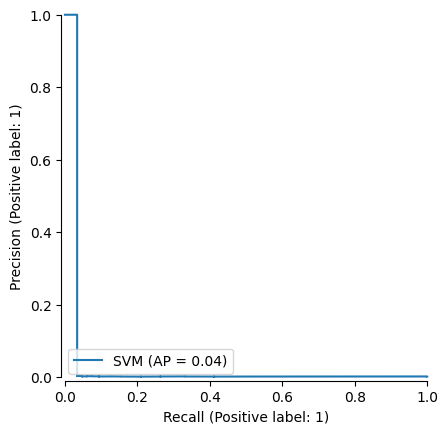

In [64]:
PrecisionRecallDisplay.from_estimator(svc, X_test, y_test, name="SVM", despine=True)